In [ ]:
!gdown 1kfM0IyhuDI0XTgcsxPo8L1_RILmg3LfE

Downloading...
From: https://drive.google.com/uc?id=1kfM0IyhuDI0XTgcsxPo8L1_RILmg3LfE
To: /content/online_retail_II.csv
100% 44.9M/44.9M [00:00<00:00, 90.5MB/s]


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:

# Load the data into a Pandas dataframe
data = pd.read_csv('/content/online_retail_II.csv', encoding='unicode_escape')

# Data Cleaning and Preparation
data = data.dropna() # Remove missing values
data = data[data.Quantity > 0] # Remove negative quantity values
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) # Convert date to datetime format
data['TotalPrice'] = data['Quantity'] * data['Price'] # Calculate total price



<Axes: xlabel='TotalPrice', ylabel='Description'>

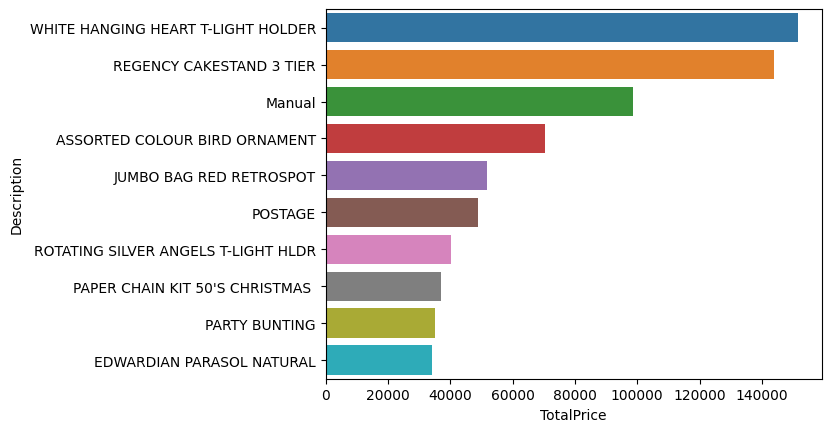

In [ ]:

# Exploratory Data Analysis
# Top selling products by revenue
top_revenue = data.groupby(['StockCode', 'Description']).agg({'TotalPrice': sum}).reset_index()
top_revenue = top_revenue.sort_values(by=['TotalPrice'], ascending=False).head(10)
sns.barplot(x='TotalPrice', y='Description', data=top_revenue)

# Sales trend over time by category
# data = data.assign(InvoiceMonth=data['InvoiceDate'].dt.to_period('M'))
# data['Category'] = data['StockCode'].str.extract('([A-Za-z]+)', expand=False)

# sales_by_month = data.groupby(['InvoiceMonth', 'Category']).agg({'TotalPrice': sum}).reset_index()
# sns.lineplot(x='InvoiceMonth', y='TotalPrice', hue='Category', data=sales_by_month)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='TotalPrice', ylabel='Invoice'>

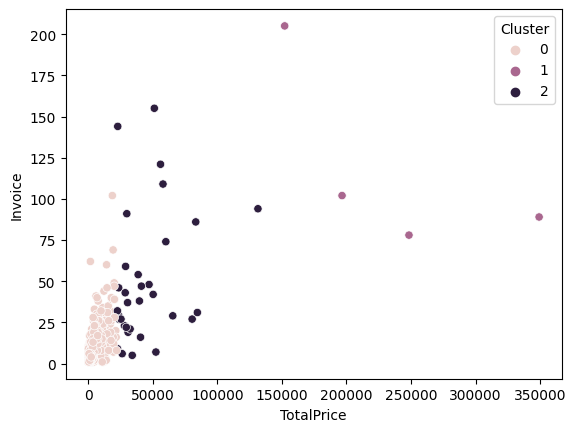

In [ ]:


# Customer segmentation using K-means clustering
customer_data = data.groupby(['Customer ID']).agg({'TotalPrice': sum, 'Invoice': lambda x: x.nunique()}).reset_index()
X = customer_data[['TotalPrice', 'Invoice']].values
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
customer_data['Cluster'] = kmeans.labels_
sns.scatterplot(x='TotalPrice', y='Invoice', hue='Cluster', data=customer_data)



In [ ]:
# Association rule mining
basket = data.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket[basket > 0] = 1
frequent_items = apriori(basket, min_support=0.05, use_colnames=True)
# rules = association_rules(frequent_items, metric="lift", min_threshold=1)
# rules = rules.sort_values(by=['lift'], ascending=False).head(10)
# sns.barplot(x='lift', y='antecedents', data=rules)


rules = association_rules(frequent_items, metric="lift", min_threshold=1)
if not rules.empty:
    rules = rules.sort_values(by=['lift'], ascending=False).head(10)
    sns.barplot(x='lift', y='antecedents', data=rules)


# Data Visualization
plt.show()

